# Tasca M5 T02

    Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# configurar els gràfics
sns.set_style('whitegrid')
sns.set_palette('flare')

## Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.
També adjunt trobaràs una descripció de les diferents variables del dataset.

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000 dollars
11. PTRATIO  pupil-teacher ratio by town
12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

*Missing Attribute Values:  None.

In [3]:
# Llegir l'arxiu
rawhousing = pd.read_csv("C:/Users/Patricia/Downloads/housing data.csv", sep=',', header=None)

In [4]:
# Afegir els noms de les columnes
rawhousing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PRATIO', 'B_1000', 'LSTAT', 'MEDV']

In [5]:
housing_orig = pd.DataFrame(rawhousing)

In [6]:
# Carregar l'informació adicional del dataset
info_columnes = {
    'CRIM': 'per capita crime rate by town',
    'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
    'NOX' : 'nitric oxides concentration (parts per 10 million)',
    'RM': 'average number of rooms per dwelling',
    'AGE': 'proportion of owner-occupied units built prior to 1940',
    'DIS': 'weighted distances to five Boston employment centres',
    'RAD': 'index of accessibility to radial highways',
    'TAX': 'full-value property-tax rate per 10,000 dollars',
    'PRATIO': 'pupil-teacher ratio by town',
    'B_1000': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    'LSTAT': '% lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000\'s'
}

In [7]:
rawhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    float64
 10  PRATIO  506 non-null    float64
 11  B_1000  506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Preprocessament

In [8]:
from sklearn import preprocessing

Primer hem de saber la seva distribució, fem el test de Kolmogorov-Smirnov

In [9]:
from scipy.stats import kstest

alpha = 0.05

for variable in rawhousing:
    stat, p_value = kstest(rawhousing[variable], 'norm')
    
    print("Variable:", variable)
    print("Estadístic de prova:", stat)
    print("Valor p:", p_value)
    
    if p_value > alpha:
        print("No es pot rebutjar la hipòtesi nul·la. Les dades semblen seguir una distribució normal.")
    else:
        print("Es rebutja la hipòtesi nul·la. Les dades no segueixen una distribució normal.")
    
    print()

Variable: CRIM
Estadístic de prova: 0.5025212984276741
Valor p: 9.101764614072096e-119
Es rebutja la hipòtesi nul·la. Les dades no segueixen una distribució normal.

Variable: ZN
Estadístic de prova: 0.5
Valor p: 1.6871111181943794e-117
Es rebutja la hipòtesi nul·la. Les dades no segueixen una distribució normal.

Variable: INDUS
Estadístic de prova: 0.9382587138709638
Valor p: 0.0
Es rebutja la hipòtesi nul·la. Les dades no segueixen una distribució normal.

Variable: CHAS
Estadístic de prova: 0.5
Valor p: 1.6871111181943794e-117
Es rebutja la hipòtesi nul·la. Les dades no segueixen una distribució normal.

Variable: NOX
Estadístic de prova: 0.6498812922347244
Valor p: 2.7133228490861893e-209
Es rebutja la hipòtesi nul·la. Les dades no segueixen una distribució normal.

Variable: RM
Estadístic de prova: 0.9998152774582629
Valor p: 0.0
Es rebutja la hipòtesi nul·la. Les dades no segueixen una distribució normal.

Variable: AGE
Estadístic de prova: 0.998134186699616
Valor p: 0.0
Es rebu

- Si són gaussianes -> Estandardització
- Si la seva distribució no és normal -> Normalització
- Si conté outliers -> RobustScaler o altres
- Si són categòriques -> Dummys o enumeració
- Altres: Polimorfisme, transformacions, cícliques,...

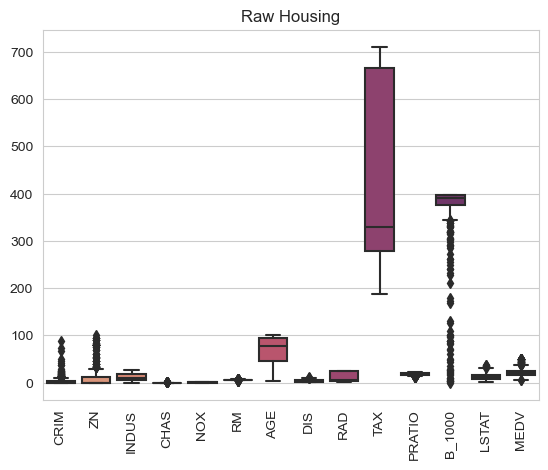

In [10]:
sns.boxplot(data=rawhousing, palette='flare')
plt.title('Raw Housing')
plt.xticks(rotation=90)
plt.show()

##### RobustScaler
Mètode de preprocessament de dades que s'utilitza per escalat de variables en l'anàlisi de dades, especialment quan hi ha presència de valors atípics o distribucions no normals.

In [11]:
from sklearn.preprocessing import RobustScaler
rawhousing[['CRIM', 'ZN', 'LSTAT', 'MEDV', 'AGE']] = RobustScaler().fit_transform(rawhousing[['CRIM', 'ZN', 'LSTAT', 'MEDV', 'AGE']])

##### StandardScaler
Mètode de preprocessament de dades que s'utilitza per escalat de variables en l'anàlisi de dades, que transforma les dades per tenir una mitjana de zero i una desviació estàndard de 1 això és útil per a algorismes que assumeixen una distribució normal de les dades.

In [12]:
from sklearn.preprocessing import StandardScaler
rawhousing[['TAX','INDUS']] = StandardScaler().fit(rawhousing[['TAX','INDUS']]).transform(rawhousing[['TAX','INDUS']])

##### MinMaxScaler
Mètode de preprocessament de dades que s'utilitza per escalat de variables en l'anàlisi de dades, que transforma les dades al rang de [0, 1]. Aquest mètode és útil per a algorismes que requereixen que les dades estiguin en un rang específic o per a visualitzar les dades en una escala comuna.

In [13]:
from sklearn.preprocessing import MinMaxScaler
rawhousing[['TAX','INDUS','DIS', 'RAD','B_1000','CRIM','ZN','PRATIO','RM','NOX']] = MinMaxScaler().fit_transform(rawhousing[['TAX','INDUS','DIS', 'RAD','B_1000','CRIM','ZN','PRATIO','RM','NOX']])

    Ara revisem la distribució

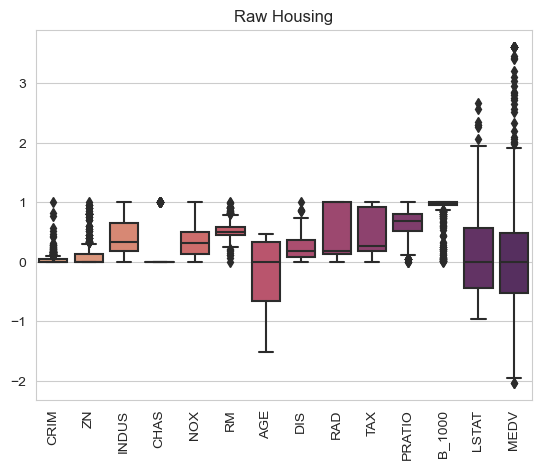

In [14]:
sns.boxplot(data=rawhousing, palette='flare')
plt.title('Raw Housing')
plt.xticks(rotation=90)
plt.show()

In [15]:
housing_def = pd.DataFrame(rawhousing) 

### Crear conjunts

In [16]:
from sklearn.model_selection import train_test_split

# Assignar VD/VI
X = housing_def[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT']]
y = housing_def['MEDV']

#Afegir els noms de les columnes
X.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT']
y.columns = 'MEDV'

#Fer la divisió dels conjunts
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Test de normalitat de Kolmogorov-Smirnov

In [19]:
from scipy.stats import ks_2samp

result_x = ks_2samp(x_train.values.flatten(), x_test.values.flatten())
result_y = ks_2samp(y_train.values.flatten(), y_test.values.flatten())

print(f"Test de Kolmogorov-Smirnov:\n"
      f"x_train vs. x_test: p-value={result_x.pvalue:.5f}, statistic={result_x.statistic:.5f}\n"
      f"y_train vs. y_test: p-value={result_y.pvalue:.5f}, statistic={result_y.statistic:.5f}")

Test de Kolmogorov-Smirnov:
x_train vs. x_test: p-value=0.30734, statistic=0.03073
y_train vs. y_test: p-value=0.25243, statistic=0.11032


Per a la comparació entre x_train i x_test:
El valor p és 0.29648, la qual cosa indica que no hi ha prou evidència per rebutjar la hipòtesi nul·la que les distribucions de x_train i x_test són diferents.
L'estadística de prova és 0,03103, que representa la màxima diferència absoluta entre les funcions de distribució acumulativa de x_train i x_test.

Per a la comparació entre y_train i y_test:
El valor p és 0.25243, la qual cosa indica que no hi ha prou evidència per rebutjar la hipòtesi nul·la que les distribucions de y_train i y_test són diferents.
L'estadística de prova és 0,11032, que representa la màxima diferència absoluta entre les funcions de distribució acumulativa de y_train i y_test.

En resum, els resultats indiquen que no hi ha diferències significatives a les distribucions dels conjunts x_train i x_test, ni als conjunts y_train i y_test.

### Coeficient de skewness (biaix)

In [20]:
from scipy.stats import skew

print(f"Coeficients de skewness:\n"
      f"x_train: {skew(x_train.values.flatten()):.5f}\n"
      f"y_train: {skew(y_train.values.flatten()):.5f}\n"
      f"x_test: {skew(x_test.values.flatten()):.5f}\n"
      f"y_test: {skew(y_test.values.flatten()):.5f}")

Coeficients de skewness:
x_train: -0.14312
y_train: 1.04509
x_test: -0.12612
y_test: 1.36636


La interpretació dels coeficients de l'skewness indica l'asimetria de les distribucions dels conjunts de dades.

Per a x_train:
- El coeficient de skewness és -0,26143. Una asimetria negativa indica que la distribució té una cua més llarga a la banda esquerra i una concentració de valors més alta al costat dret.
- En aquest cas, la distribució de x_train té una lleugera asimetria negativa.

Per a y_train:
- El coeficient de skewness és 1.04509. Una asimetria positiva indica que la distribució té una cua més llarga a la banda dreta i una concentració de valors més alta a la banda esquerra.
- En aquest cas, la distribució de y_train té una asimetria positiva significativa.

Per a x_test:
- El coeficient de skewness és -0,37127. Igual que en el cas de x_train, la distribució de x_test té una lleugera asimetria negativa.

Per a i_test:
- El coeficient de skewness és 1.36636. Com en el cas de y_train, la distribució de y_test té una asimetria positiva significativa.

Aquests resultats indiquen que tant x_train com x_test tenen una asimetria negativa, mentre que y_train i y_test presenten una asimetria positiva.

### Distribució

In [21]:
y_train = y_train.to_numpy()

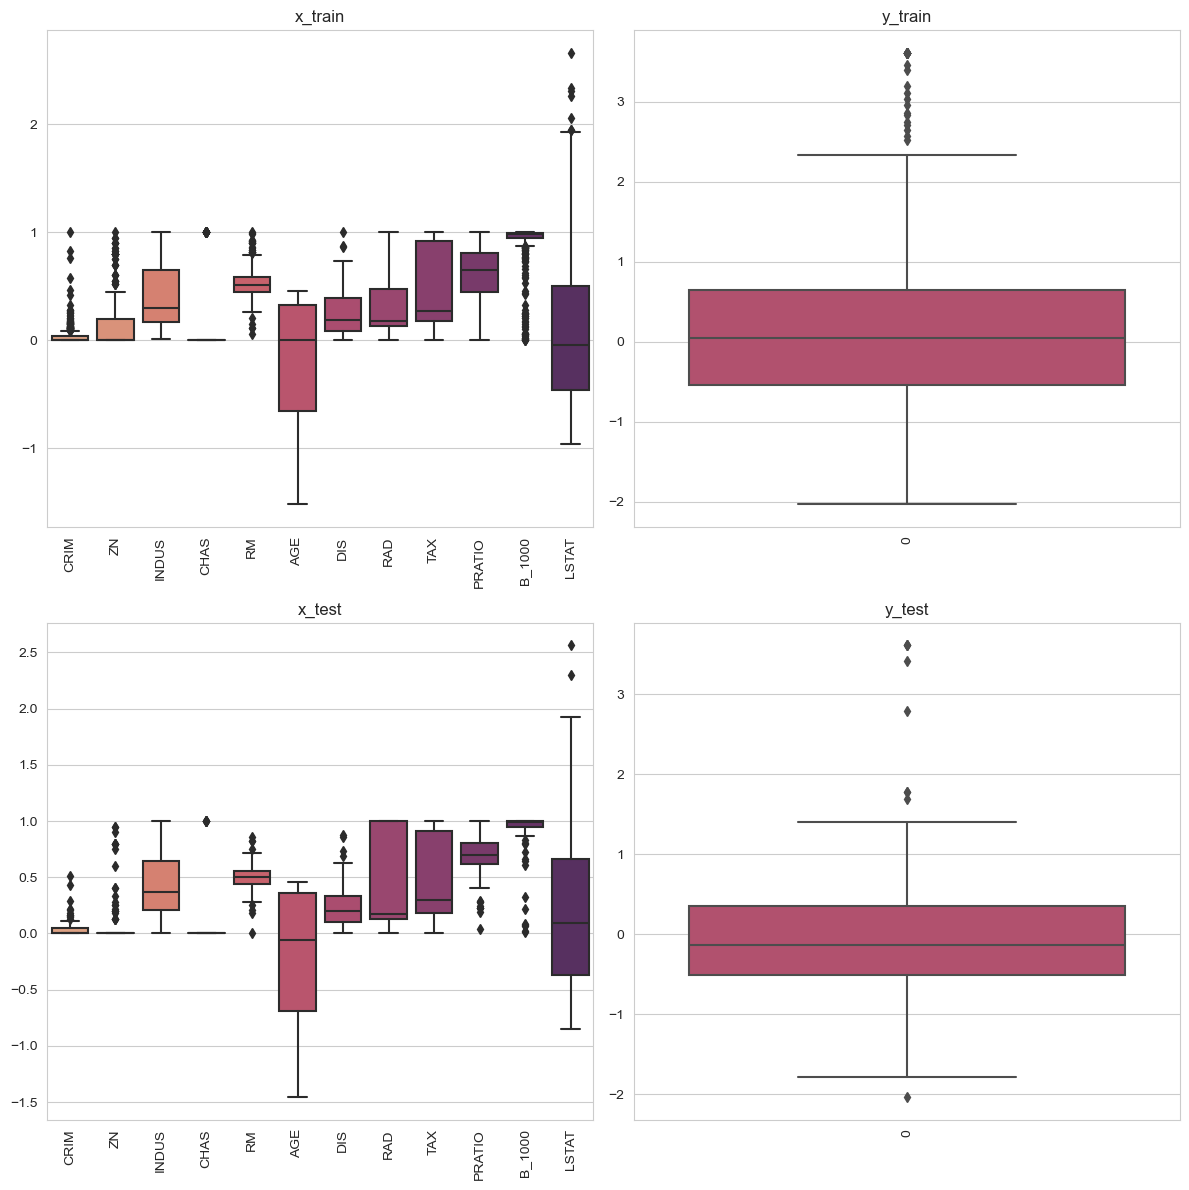

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Boxplot x_train
sns.boxplot(data=x_train, ax=axes[0, 0], palette='flare')
axes[0, 0].set_title('x_train')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

#Boxplot y_train
sns.boxplot(data=y_train, ax=axes[0, 1], palette='flare')
axes[0, 1].set_title('y_train')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Boxplot x_test
sns.boxplot(data=x_test, ax=axes[1, 0], palette='flare')
axes[1, 0].set_title('x_test')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Boxplot y_test
sns.boxplot(data=y_test, ax=axes[1, 1], palette='flare')
axes[1, 1].set_title('y_test')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


A més veiem que la distribució es força similar

### Correlació

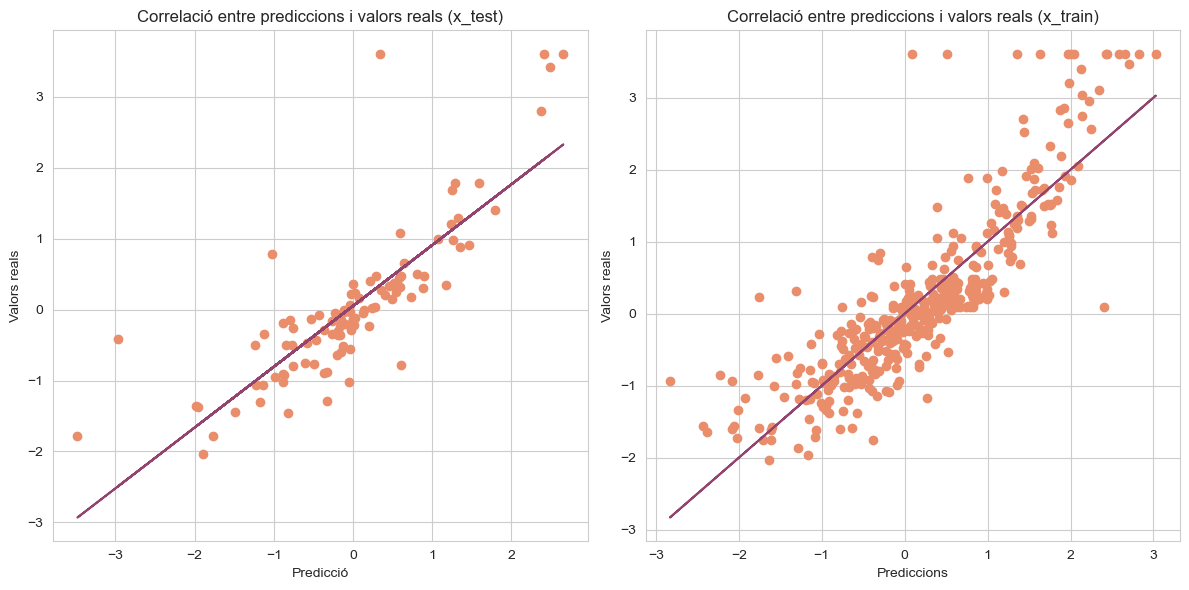

Coeficient de determinació (R²) pel conjunt de prova: 0.6543407093082297
Coeficient de determinació (R²) pel conjunt de entrenament: 0.7403517718273758


In [23]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Regressió lineal
RL = LinearRegression().fit(x_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gràfic per prova
axes[0].scatter(RL.predict(x_test), y_test)
axes[0].set_xlabel("Predicció")
axes[0].set_ylabel("Valors reals")
axes[0].set_title("Correlació entre prediccions i valors reals (x_test)")
axes[0].plot(RL.predict(x_test), np.polyval(np.polyfit(RL.predict(x_test), y_test, deg=1), RL.predict(x_test)), color='#93446E')

# Gràfic per entrenament
axes[1].scatter(RL.predict(x_train), y_train)
axes[1].set_xlabel("Prediccions")
axes[1].set_ylabel("Valors reals")
axes[1].set_title("Correlació entre prediccions i valors reals (x_train)")
axes[1].plot(RL.predict(x_train), np.polyval(np.polyfit(RL.predict(x_train), y_train, deg=1), RL.predict(x_train)), color='#93446E')

plt.tight_layout()
plt.show()

print(f"Coeficient de determinació (R²) pel conjunt de prova: {RL.score(x_test, y_test)}")
print(f"Coeficient de determinació (R²) pel conjunt de entrenament: {RL.score(x_train, y_train)}")

- Coeficient de determinació (R²) pel conjunt de prova: Aproximadament el 65.43% de la variabilitat a la variable dependent pot ser explicada pel model de regressió lineal en el conjunt de prova. Com més a prop estigui el valor d'1, millor és l'ajustament del model a les dades

- Coeficient de determinació (R²) pel conjunt d'entrenament:Aproximadament el 74,04% de la variabilitat a la variable dependent pot ser explicada pel model de regressió lineal al conjunt d'entrenament

A més podem veure amb claredat als gràfics que les dades s'agrupen a llocs semblants

## Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

### Estandaritzar
L'estandardització es refereix a la transformació de les dades de manera que tinguin una mitjana de zero i una desviació estàndard d'un. Això s'aconsegueix restant la mitjana de cada valor i dividint per la desviació estàndard. El resultat és una distribució de dades centrada en zero i amb una dispersió similar entre les característiques.

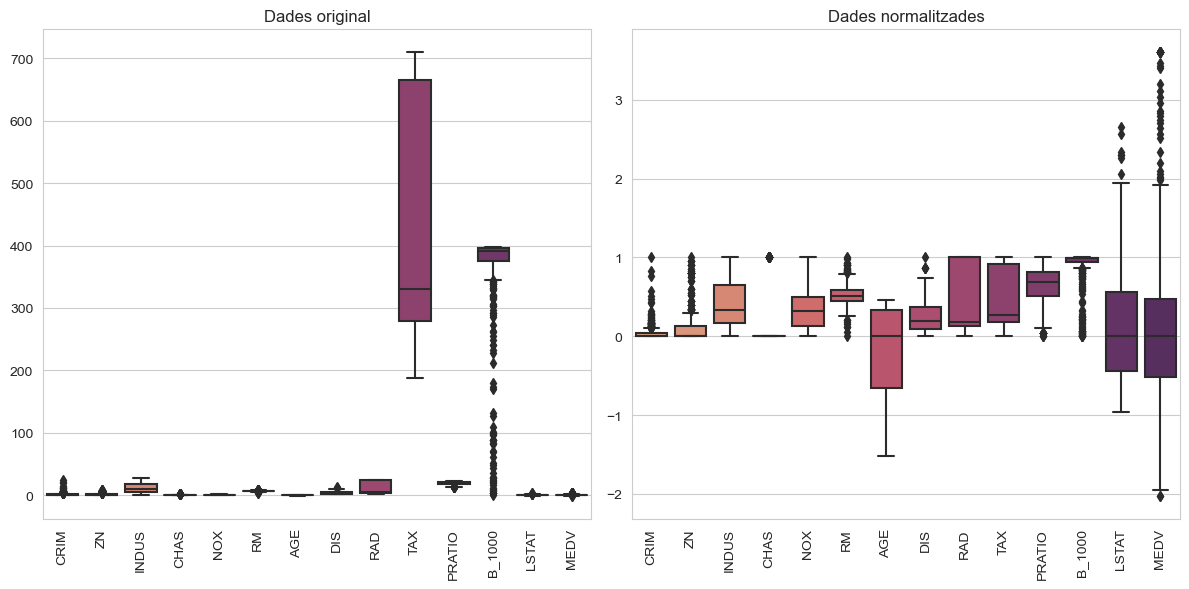

In [24]:
#Aquest procès ja s'ha fet a l'exercici 1, fem una gràfic per a poder veure la diferència

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot del dataset original
sns.boxplot(data=housing_orig, ax=axes[0], palette='flare')
axes[0].set_title('Dades original')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Boxplot del dataset modificat
sns.boxplot(data=housing_def, ax=axes[1], palette='flare')
axes[1].set_title('Dades normalitzades')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


### Creació de variable polinòmica

En aquest procés, es creen noves columnes o variables en el conjunt de dades original. Aquestes noves variables es generen mitjançant l' elevació de les característiques existents a diferents potències i la combinació d' elles. 

In [25]:
# Revisem les abreviatures
for key, value in info_columnes.items():
    print(f"{key} : {value}")

CRIM : per capita crime rate by town
ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS : proportion of non-retail business acres per town
CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX : nitric oxides concentration (parts per 10 million)
RM : average number of rooms per dwelling
AGE : proportion of owner-occupied units built prior to 1940
DIS : weighted distances to five Boston employment centres
RAD : index of accessibility to radial highways
TAX : full-value property-tax rate per 10,000 dollars
PRATIO : pupil-teacher ratio by town
B_1000 : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT : % lower status of the population
MEDV : Median value of owner-occupied homes in $1000's


#### RM_squared = Aquesta nova variable representa el quadrat de la mitjana del nombre d'habitacions per habitatge (RM).

In [26]:
# Revisem RM
print(info_columnes['RM'])

average number of rooms per dwelling


In [27]:
# Crear RM_squared en x_train
x_train['RM_squared'] = x_train['RM'] ** 2
# Crear RM_squared en x_test
x_test['RM_squared'] = x_test['RM'] ** 2

In [28]:
#Afegim al diccionari
info_columnes['RM_squared'] = "Quadrat de la mitjana del nombre d'habitacions per habitatge (RM)"

#### TAX_RM: Aquesta nova variable és el producte entre la taxa d'impostos a la propietat (TAX) i la mitjana del nombre d'habitacions per habitatge (RM). 

In [29]:
# Revisem TAX
print(info_columnes['TAX'])
# Revisem RM
print(info_columnes['RM'])

full-value property-tax rate per 10,000 dollars
average number of rooms per dwelling


In [30]:
# Creem TAX_RM
x_train['TAX_RM'] = x_train['TAX'] * x_train['RM']
x_test['TAX_RM'] = x_test['TAX'] * x_test['RM']

In [31]:
#Afegim al diccionari
info_columnes['TAX_RM'] = "Producte entre la taxa d'impostos a la propietat (TAX) i la mitjana del nombre d'habitacions per habitatge"

### Crear una variable dummy
Crear una variable dummy és útil quan es té una variable categòrica que no es pot utilitzar directament en un model d' aprenentatge automàtic, ja que els algorismes generalment treballen amb dades numèriques. Una variable dummy s'utilitza per representar la informació categòrica en forma de variables binàries (0 o 1)

In [32]:
# Crear variable dummy a conjunt d'entrenament
x_train = pd.concat([x_train, pd.get_dummies(x_train['CHAS'], prefix='CHAS')], axis=1)
x_train.drop('CHAS', axis=1, inplace=True)
# Crear variable dummy a conjunt de prova
x_test = pd.concat([x_test, pd.get_dummies(x_test['CHAS'], prefix='CHAS')], axis=1)
x_test.drop('CHAS', axis=1, inplace=True)

In [33]:
x_test

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PRATIO,B_1000,LSTAT,RM_squared,TAX_RM,CHAS_0,CHAS_1
173,0.000961,0.0,0.131598,0.547040,0.134557,0.137921,0.173913,0.208015,0.425532,0.996470,-0.231884,0.299252,0.113793,1,0
274,0.000563,0.4,0.218109,0.612569,-0.909276,0.268076,0.130435,0.127863,0.531915,1.000000,-0.782609,0.375241,0.078325,0,1
491,0.001117,0.0,1.000000,0.464074,0.434251,0.067155,0.130435,1.000000,0.797872,0.982879,0.670665,0.215364,0.464074,1,0
72,0.000959,0.0,0.379399,0.479785,-1.420999,0.378079,0.130435,0.225191,0.702128,0.984896,-0.583708,0.230194,0.108043,1,0
452,0.057141,0.0,0.646628,0.524238,0.291539,0.112632,1.000000,0.914122,0.808511,0.970220,0.590705,0.274826,0.479218,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.211360,0.0,0.646628,0.204445,0.458716,0.038584,1.000000,0.914122,0.808511,0.071789,2.299850,0.041798,0.186888,1,0
436,0.162015,0.0,0.646628,0.555662,0.322120,0.079386,1.000000,0.914122,0.808511,0.068511,0.668666,0.308760,0.507943,1,0
411,0.157855,0.0,0.646628,0.593217,0.458716,0.036183,1.000000,0.914122,0.808511,0.087574,0.985507,0.351907,0.542273,1,0
86,0.000512,0.0,0.147727,0.470205,-0.660550,0.299866,0.086957,0.114504,0.627660,0.997705,0.149925,0.221093,0.053840,1,0


## Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

#### Conjunt d'entrenament

In [34]:
display(x_train[['RM_squared','TAX_RM']].describe())

,RM_squared,TAX_RM
count,404.000000,404.000000
mean,0.297067,0.206541
std,0.156956,0.159827
min,0.003348,0.000000
25%,0.199228,0.093546
50%,0.257626,0.149218
75%,0.347318,0.279297
max,1.000000,0.914122


In [35]:
display(pd.DataFrame({'CHAS_0': x_train['CHAS_0'].value_counts(), 'CHAS_1': x_train['CHAS_1'].value_counts()}))

,CHAS_0,CHAS_1
0,29,375
1,375,29


#### Conjunt de prova

In [36]:
display(x_test[['RM_squared','TAX_RM']].describe())

,RM_squared,TAX_RM
count,102.000000,102.000000
mean,0.264171,0.212372
std,0.126967,0.167216
min,0.000000,0.000000
25%,0.195780,0.088485
50%,0.250000,0.132756
75%,0.312659,0.323989
max,0.734553,0.657173


In [37]:
display(pd.DataFrame({'CHAS_0': x_test['CHAS_0'].value_counts(), 'CHAS_1': x_test['CHAS_1'].value_counts()}))

,CHAS_0,CHAS_1
0,6,96
1,96,6


#### Amb les variables que van ser creades, com per les dos polinomiques van fer servir RM no tindria sentit fer un creuament, 

A continuació creuem aquestes variables polinomiques amb altres del dataset

###### RM_squared x MEDV

In [38]:
# Revisem RM_squared
print(info_columnes['RM_squared'])
# Revisem MEDV
print(info_columnes['MEDV'])

Quadrat de la mitjana del nombre d'habitacions per habitatge (RM)
Median value of owner-occupied homes in $1000's


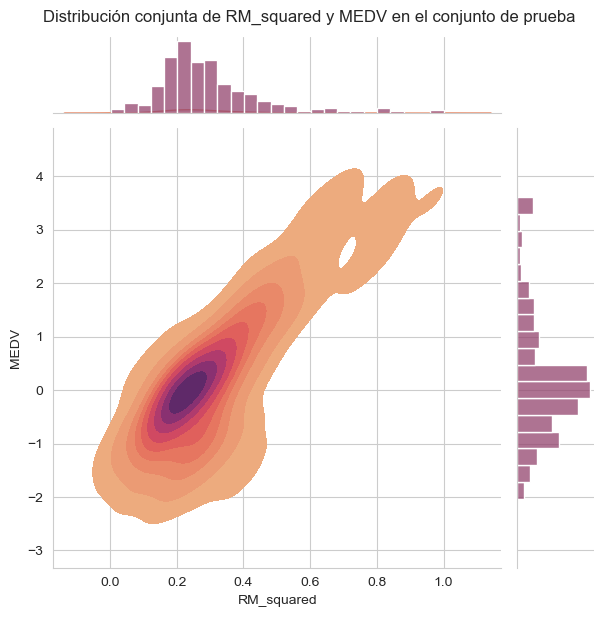

In [39]:
# Jointgrid amb histograma marginal RM_squared x MEDV
g = sns.jointplot(data=x_train, x="RM_squared", y=y_train, kind="kde", cmap="flare", fill=True)
g.plot_joint(sns.kdeplot, cmap="flare", fill=True)
g.plot_marginals(sns.histplot, color='#93446E')

# Configurar etiquetes i títol
g.set_axis_labels("RM_squared", "MEDV")
g.fig.suptitle("Distribución conjunta de RM_squared y MEDV en el conjunto de prueba", y=1.02)

plt.show()

Els jointplot no són més que un gràfic de disperssió amb histogrames, llavors per interpretar l'interior hem de pensar que on es més fosc hi ha més concentració, en aquest cas parlarien de coincidències, després tenim la distribució marginal de cada variable

###### TAX_RM x MEDV

In [40]:
# Revisem RM_squared
print(info_columnes['TAX_RM'])
# Revisem DIS
print(info_columnes['MEDV'])

Producte entre la taxa d'impostos a la propietat (TAX) i la mitjana del nombre d'habitacions per habitatge
Median value of owner-occupied homes in $1000's


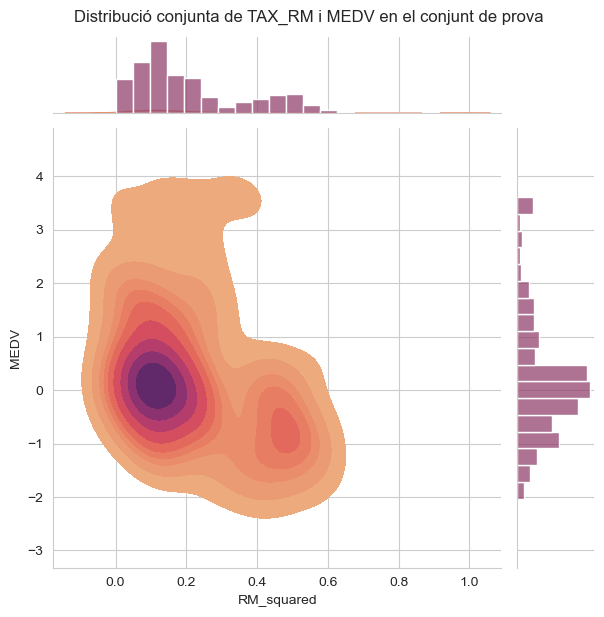

In [41]:
# Jointgrid amb histograma marginal RM_squared x MEDV
g = sns.jointplot(data=x_train, x="TAX_RM", y=y_train, kind="kde", cmap="flare", fill=True)
g.plot_joint(sns.kdeplot, cmap="flare", fill=True)
g.plot_marginals(sns.histplot, color='#93446E')

# Configurar etiquetes i títol
g.set_axis_labels("RM_squared", "MEDV")
g.fig.suptitle("Distribució conjunta de TAX_RM i MEDV en el conjunt de prova", y=1.02)

plt.show()

Els jointplot no són més que un gràfic de disperssió amb histogrames, llavors per interpretar l'interior hem de pensar que on es més fosc hi ha més concentració, en aquest cas parlarien de coincidències, després tenim la distribució marginal de cada variable

#### Visualització amb variable dummy

In [42]:
# Revisem CHAS
print(info_columnes['CHAS']) # CHAS_1 correspondrà en 1 és el mateix que un i viceversa

Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)


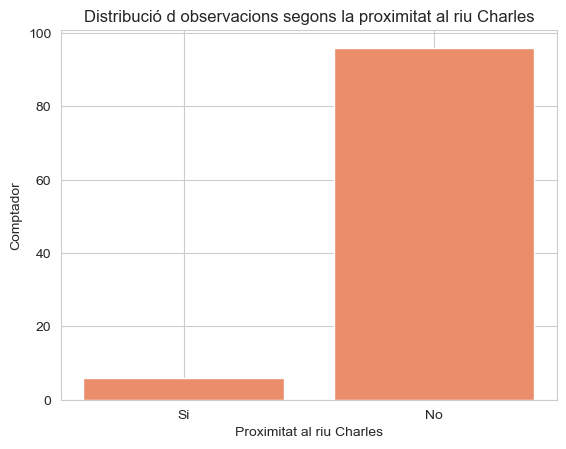

In [43]:
# Fem el gràfic
plt.bar(['Si', 'No'], [sum(1 for value in x_test['CHAS_1'] if value == True), sum(1 for value in x_test['CHAS_0'] if value == True)])
plt.xlabel('Proximitat al riu Charles')
plt.ylabel('Comptador')
plt.title('Distribució d observacions segons la proximitat al riu Charles')
plt.show()

    Podem veure que hi han més que no son a propr del riu Charles, aquest gràfic realment es podria haver fet no més amb una variable perquè si son True a una vol dir que son False a l'altre